In [1]:
#imorting Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_d65e2fcdaff2451d96458aa6cabdd8a4 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='_PIMGvlD93bPTs5DmMf73aZexhaOt2K0rmxpgS6cYMlA',
    ibm_auth_endpoint="https://iam.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_d65e2fcdaff2451d96458aa6cabdd8a4.get_object(Bucket='advertisingbasedonusage-donotdelete-pr-yohmbxgcwqokja',Key='advertising.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

dataset = pd.read_csv(body)
dataset.head()



,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [3]:
#less impact columns are dropped
dataset=dataset.drop(['Ad Topic Line','City','Country','Timestamp'],axis=1)
dataset

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,0
2,69.47,26,59785.94,236.50,0,0
3,74.15,29,54806.18,245.89,1,0
4,68.37,35,73889.99,225.58,0,0
5,59.99,23,59761.56,226.74,1,0
6,88.91,33,53852.85,208.36,0,0
7,66.00,48,24593.33,131.76,1,1
8,74.53,30,68862.00,221.51,1,0
9,69.88,20,55642.32,183.82,1,0


In [4]:
#the impact between the columns is measured
dataset.corr()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
Daily Time Spent on Site,1.000000,-0.331513,0.310954,0.518658,-0.018951,-0.748117
Age,-0.331513,1.000000,-0.182605,-0.367209,-0.021044,0.492531
Area Income,0.310954,-0.182605,1.000000,0.337496,0.001322,-0.476255
Daily Internet Usage,0.518658,-0.367209,0.337496,1.000000,0.028012,-0.786539
Male,-0.018951,-0.021044,0.001322,0.028012,1.000000,-0.038027
Clicked on Ad,-0.748117,0.492531,-0.476255,-0.786539,-0.038027,1.000000


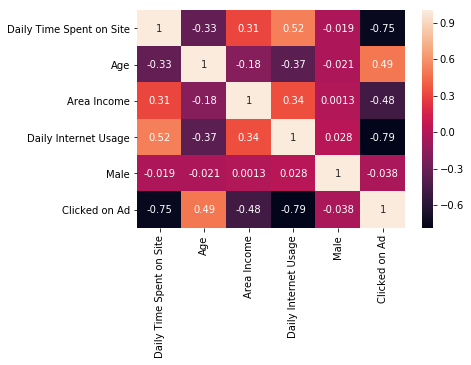

In [5]:
import seaborn as sns
sns.heatmap(dataset.corr(),annot=True)

In [6]:
#verifying whether any null values present or not
dataset.isnull().any()

Daily Time Spent on Site    False
Age                         False
Area Income                 False
Daily Internet Usage        False
Male                        False
Clicked on Ad               False
dtype: bool

In [7]:
#for slicing of independent and dependent variables
x=dataset.iloc[:,:-1].values 
x

array([[  6.89500000e+01,   3.50000000e+01,   6.18339000e+04,
          2.56090000e+02,   0.00000000e+00],
       [  8.02300000e+01,   3.10000000e+01,   6.84418500e+04,
          1.93770000e+02,   1.00000000e+00],
       [  6.94700000e+01,   2.60000000e+01,   5.97859400e+04,
          2.36500000e+02,   0.00000000e+00],
       ..., 
       [  5.16300000e+01,   5.10000000e+01,   4.24157200e+04,
          1.20370000e+02,   1.00000000e+00],
       [  5.55500000e+01,   1.90000000e+01,   4.19207900e+04,
          1.87950000e+02,   0.00000000e+00],
       [  4.50100000e+01,   2.60000000e+01,   2.98758000e+04,
          1.78350000e+02,   0.00000000e+00]])

In [8]:
y=dataset.iloc[:,-1:].values
y

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
    

In [9]:
#to check whether any duplicate records are present or not
dataset.duplicated()

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
970    False
971    False
972    False
973    False
974    False
975    False
976    False
977    False
978    False
979    False
980    False
981    False
982    False
983    False
984    False
985    False
986    False
987    False
988    False
989    False
990    False
991    False
992    False
993    False
994    False
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [10]:
#we split the dataset for testing and training
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
x_train

array([[  7.32700000e+01,   2.80000000e+01,   6.73013900e+04,
          2.16240000e+02,   1.00000000e+00],
       [  5.15600000e+01,   4.60000000e+01,   6.31021900e+04,
          1.24850000e+02,   0.00000000e+00],
       [  5.63000000e+01,   4.90000000e+01,   6.74309600e+04,
          1.35240000e+02,   1.00000000e+00],
       ..., 
       [  7.39400000e+01,   2.60000000e+01,   5.54110600e+04,
          2.36150000e+02,   1.00000000e+00],
       [  7.86400000e+01,   3.10000000e+01,   6.02834700e+04,
          2.35280000e+02,   1.00000000e+00],
       [  4.20600000e+01,   3.40000000e+01,   4.32411900e+04,
          1.31550000e+02,   0.00000000e+00]])

# Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(x_train,y_train)

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [12]:
y_predict=classifier.predict(x_test)
y_predict

array([0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0])

In [13]:
from sklearn.metrics import accuracy_score#to find accurate in feature scaling accuracy_score is used
accuracy_score(y_test,y_predict)

0.91500000000000004

In [14]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predict)
cm

array([[102,   6],
       [ 11,  81]])

In [15]:
import sklearn.metrics as metrics
fpr,tpr,threshold =metrics.roc_curve(y_test,y_predict)
roc_auc=metrics.auc(fpr,tpr)#auc specifies at what point curve is inclined to 1
roc_auc

0.91243961352656999

<function matplotlib.pyplot.plot>

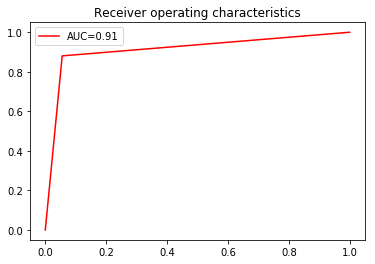

In [16]:
plt.title('Receiver operating characteristics')
plt.plot(fpr,tpr,label='AUC=%0.2f'%roc_auc,color='red')
plt.legend()
plt.plot

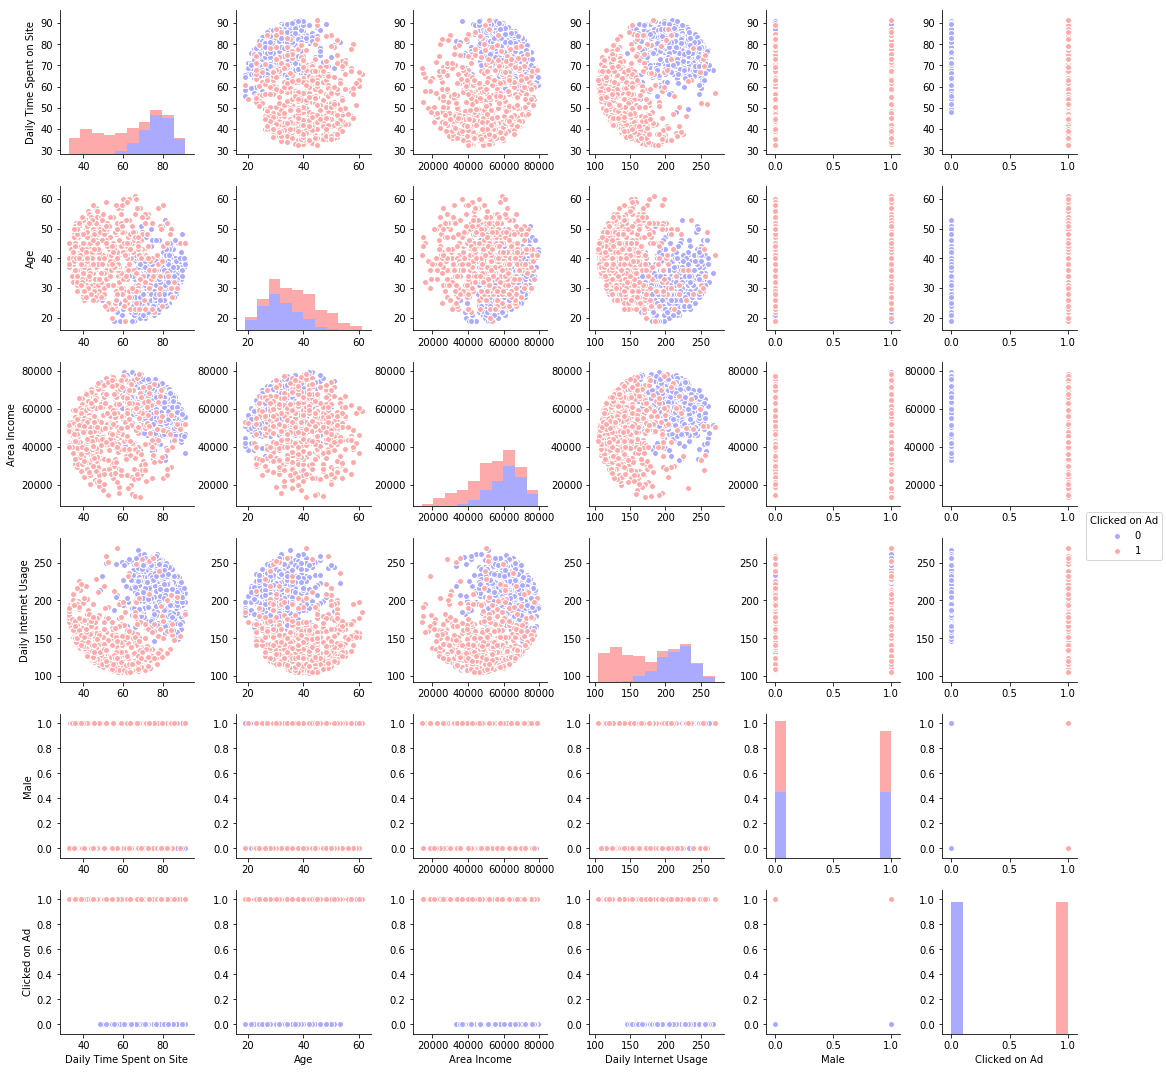

In [17]:
sns.pairplot(dataset,hue='Clicked on Ad',palette='bwr')

Text(0.5,0,'Age')

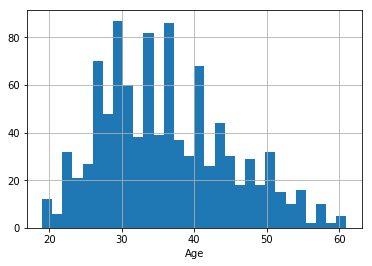

In [18]:
dataset['Age'].hist(bins=30)
plt.xlabel('Age')

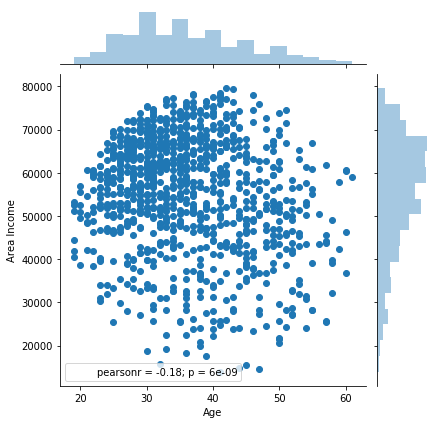

In [19]:
sns.jointplot(x='Age',y='Area Income',data=dataset)

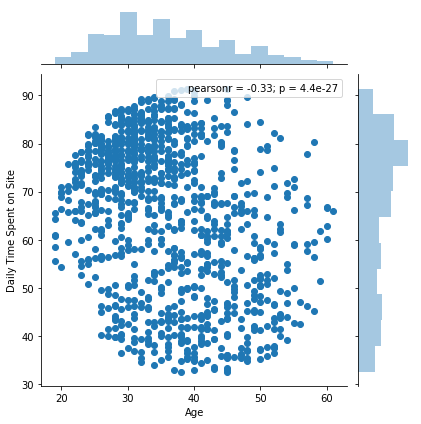

In [20]:
sns.jointplot(x='Age',y='Daily Time Spent on Site',data=dataset)

In [21]:
dataset.groupby(['Male','Clicked on Ad'])['Clicked on Ad'].count().unstack()

Clicked on Ad,0,1
Male,,
0,250,269
1,250,231


In [22]:
!pip install watson-machine-learning-client --upgrade

Requirement already up-to-date: watson-machine-learning-client in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (1.0.365)
Requirement not upgraded as not directly required: urllib3 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from watson-machine-learning-client) (1.22)
Requirement not upgraded as not directly required: requests in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from watson-machine-learning-client) (2.18.4)
Requirement not upgraded as not directly required: lomond in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from watson-machine-learning-client) (0.1.13)
Requirement not upgraded as not directly required: certifi in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from watson-machine-learning-client) (2019.3.9)
Requirement not upgraded as not directly required: tabulate in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from watson-machine-learning-client) (0.8.2)
Requirement not upgraded as not direc

In [23]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
2019-05-24 05:26:28,644 - watson_machine_learning_client.metanames - WARNING - 'AUTHOR_EMAIL' meta prop is deprecated. It will be ignored.


In [24]:
wml_credentials={
    "access_key": "7EQIJwciOezkiOGKy0HrNDgCVvoy7Uf4uj5d3IqJq50t",
    "instance_id": "d9fb4aa9-0ea5-4a71-bf34-f73ada305ed8",
  "password": "b840d3dc-c818-4cc2-8ae4-10b2c7e43b21",
  "url": "https://eu-gb.ml.cloud.ibm.com",
  "username": "e30799e5-63f5-4559-ae20-80c7df615cd8"
}

In [25]:
client = WatsonMachineLearningAPIClient(wml_credentials)
import json

In [26]:
instance_details = client.service_instance.get_details()
print(json.dumps(instance_details, indent=2))

{
  "entity": {
    "tags": null,
    "owner": {
      "ibm_id": "5500034QJC",
      "beta_user": false,
      "email": "ramyam269@gmail.com",
      "user_id": "d768cca3-1ddf-40d4-a1eb-7b1e5cf57b1d",
      "country_code": "IND"
    },
    "deployments": {
      "url": "https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/d9fb4aa9-0ea5-4a71-bf34-f73ada305ed8/deployments"
    },
    "region": "eu-gb",
    "source": "Bluemix",
    "plan_id": "3f6acf43-ede8-413a-ac69-f8af3bb0cbfe",
    "account": {
      "id": "9dac90a8048f49d2a0b4ca0adf30c691",
      "name": "Ramya Mikkilineni's Account",
      "type": "STANDARD"
    },
    "space_guid": "N/A",
    "plan": "lite",
    "published_models": {
      "url": "https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/d9fb4aa9-0ea5-4a71-bf34-f73ada305ed8/published_models"
    },
    "status": "Active",
    "organization_guid": "N/A",
    "usage": {
      "deployment_count": {
        "limit": 5,
        "current": 0
      },
      "gpu_count_k80": {
        "li

In [27]:
model_props = {client.repository.ModelMetaNames.AUTHOR_NAME: "Ramya", 
               client.repository.ModelMetaNames.AUTHOR_EMAIL: "ramyam269@gmail.com", 
               client.repository.ModelMetaNames.NAME: "Advertising Based On Usage"}

In [28]:
model_artifact =client.repository.store_model(classifier, meta_props=model_props)

In [29]:
published_model_uid = client.repository.get_model_uid(model_artifact)

In [30]:
published_model_uid

'9956de2e-d35d-4f96-b10f-699741d1f23c'

In [31]:
created_deployment = client.deployments.create(published_model_uid, name="AdvertisingBasedOnUsage")



#######################################################################################

Synchronous deployment creation for uid: '9956de2e-d35d-4f96-b10f-699741d1f23c' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='735ff128-9efa-4d4a-ac00-c4ee3c384e91'
------------------------------------------------------------------------------------------------




In [32]:
scoring_endpoint = client.deployments.get_scoring_url(created_deployment)
scoring_endpoint

'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/d9fb4aa9-0ea5-4a71-bf34-f73ada305ed8/deployments/735ff128-9efa-4d4a-ac00-c4ee3c384e91/online'

In [33]:
client.deployments.list()

------------------------------------  -----------------------  ------  --------------  ------------------------  -----------------  -------------
GUID                                  NAME                     TYPE    STATE           CREATED                   FRAMEWORK          ARTIFACT TYPE
735ff128-9efa-4d4a-ac00-c4ee3c384e91  AdvertisingBasedOnUsage  online  DEPLOY_SUCCESS  2019-05-24T05:26:30.665Z  scikit-learn-0.19  model
8775de3e-3d5b-43cd-941f-0065fc4478f2  AdvertisingBasedOnUsage  online  DEPLOY_SUCCESS  2019-05-22T06:23:36.558Z  scikit-learn-0.19  model
0b7e366c-7a46-4177-9bf5-e400f6322a37  MultiLinear              online  DEPLOY_SUCCESS  2019-05-18T04:57:34.825Z  scikit-learn-0.19  model
------------------------------------  -----------------------  ------  --------------  ------------------------  -----------------  -------------


In [34]:
client.deployments.delete("8775de3e-3d5b-43cd-941f-0065fc4478f2")

'SUCCESS'